

### Questão Única –
 (Regressão e Ajuste de Curvas) – Implementar os modelos de regressão linear múltipla de mínimos quadrados (MQ), rede Perceptron Logístico (PS) e rede MLP (1 e 2 camadas ocultas) ao seguinte conjunto de dados:

 1) O histograma dos resíduos (erros usando apenas os dados de treinamento). Comentar sobre o histograma obtido e o esperado quanto à gaussianidade
dos resíduos.
2) Os gráficos de dispersão do valor de saída medido versus valor de saída predito pelo modelo para os dados de treino/teste. Estes gráficos estão de acordo com o esperado para um bom modelo preditivo?
3) Valores do coeficiente de correlação entre os valores de saída medidos e os preditos para os dados de treino/teste.




Real estate valuation data set
Disponível em https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set 

Compare os resultados com aqueles reportados no artigo a seguir.
Yeh, I. C., & Hsu, T. K. (2018).

 Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.
https://www.sciencedirect.com/science/article/abs/pii/S1568494618300358

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
path =r"G:\Meu Drive\UFC\MESTRADO\Int Computacional Aplicada\data\raw\Real estate valuation data set.xlsx"
df = pd.read_excel(io=path)




# Selecionar features e target
X = df[["X2 house age", "X3 distance to the nearest MRT station",
        "X4 number of convenience stores", "X5 latitude", "X6 longitude"]]
y = df["Y house price of unit area"]


# Dividir em treino e teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


<Axes: >

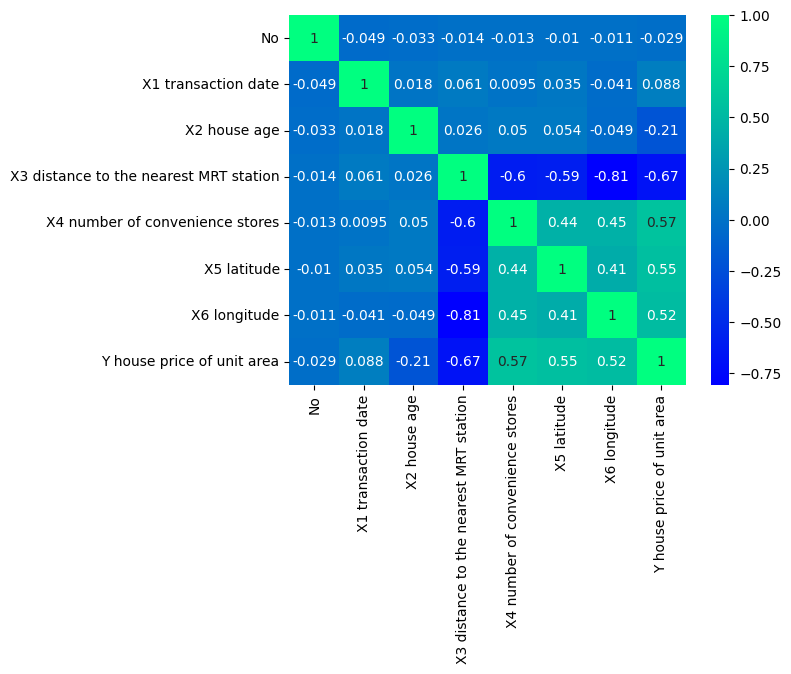

In [76]:
sns.heatmap(df.corr(), annot=True,cmap='winter')

In [65]:
# === 2) Criar modelo e treinar ===
model = LinearRegression()
model.fit(X_train, y_train)

# Previsões
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Resíduos (treino)
residuals = y_train - y_train_pred

LinearRegression()

### Distribuição de Residuos REGRESSION LINEAR 

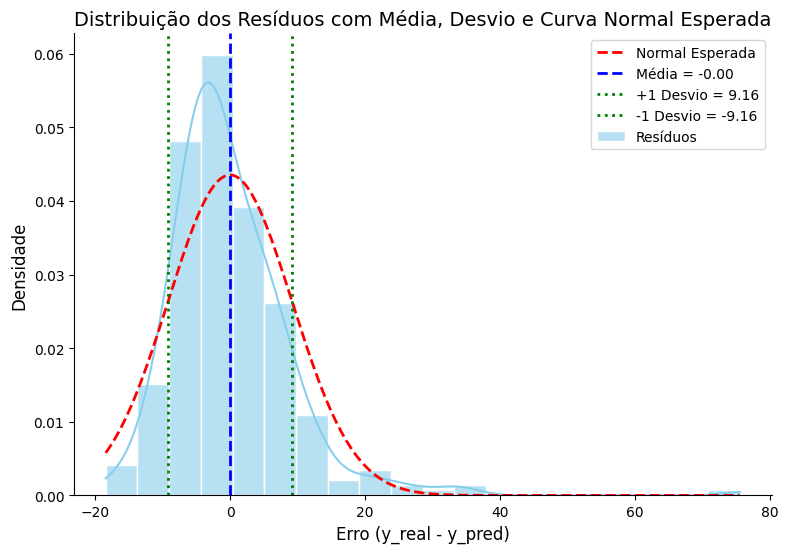

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Calcular média e desvio padrão dos resíduos
mu, sigma = residuals.mean(), residuals.std()
x = np.linspace(min(residuals), max(residuals), 200)

plt.figure(figsize=(9,6))

# Histograma + KDE dos resíduos
sns.histplot(residuals, bins=20, stat="density", kde=True, 
             color="skyblue", edgecolor="white", alpha=0.6, label="Resíduos")

# Curva normal teórica
plt.plot(x, norm.pdf(x, mu, sigma), color="red", lw=2, linestyle="--", label="Normal Esperada")

# Linhas da média e desvio padrão
plt.axvline(mu, color="blue", linestyle="--", lw=2, label=f"Média = {mu:.2f}")
plt.axvline(mu + sigma, color="green", linestyle=":", lw=2, label=f"+1 Desvio = {mu+sigma:.2f}")
plt.axvline(mu - sigma, color="green", linestyle=":", lw=2, label=f"-1 Desvio = {mu-sigma:.2f}")

# Estilo do gráfico
plt.title("Distribuição dos Resíduos com Média, Desvio e Curva Normal Esperada", fontsize=14)
plt.xlabel("Erro (y_real - y_pred)", fontsize=12)
plt.ylabel("Densidade", fontsize=12)
plt.legend()
sns.despine()
plt.show()


### Análise do Histograma dos Resíduos (Regressão Linear)

O histograma dos resíduos obtido apresenta uma distribuição **aproximadamente simétrica** em torno de zero, mas com certa assimetria e a presença de valores extremos (outliers).  
No caso ideal, espera-se que os resíduos de um modelo de regressão linear sigam uma **distribuição normal (gaussiana) com média zero** e variância constante, o que indicaria que o modelo está capturando bem a relação entre variáveis sem viés sistemático.

No gráfico, sobrepusemos a curva da **distribuição normal esperada** (em vermelho) usando a média e o desvio padrão dos resíduos. É possível observar que a forma geral lembra uma normal, mas existem desvios perceptíveis — como caudas mais pesadas e maior concentração em torno do zero do que o esperado.

🔎 **Interpretação:** Isso sugere que o modelo linear captura parte da relação entre as variáveis e o preço, mas não totalmente. Há indícios de que padrões não lineares ou interações entre variáveis não estão sendo bem representados, o que abre espaço para testar modelos mais complexos, como redes neurais (MLP).


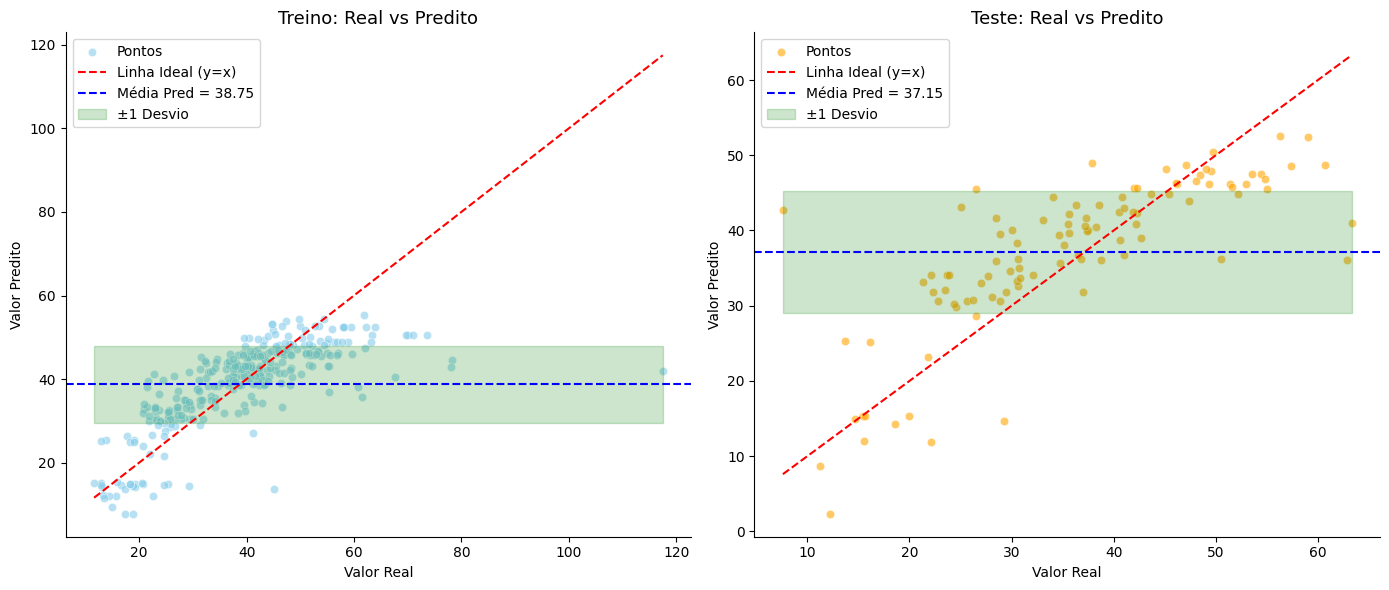

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calcular média e desvio dos resíduos no treino e teste
mu_train, sigma_train = (y_train - y_train_pred).mean(), (y_train - y_train_pred).std()
mu_test, sigma_test = (y_test - y_test_pred).mean(), (y_test - y_test_pred).std()

fig, axs = plt.subplots(1, 2, figsize=(14,6))

# --- Treino ---
sns.scatterplot(x=y_train, y=y_train_pred, alpha=0.6, color="skyblue", ax=axs[0], label="Pontos")
axs[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "r--", label="Linha Ideal (y=x)")

# Média e desvio nos preditos
axs[0].axhline(y_train_pred.mean(), color="blue", linestyle="--", lw=1.5, label=f"Média Pred = {y_train_pred.mean():.2f}")
axs[0].fill_between([y_train.min(), y_train.max()],
                    y_train_pred.mean()-sigma_train, y_train_pred.mean()+sigma_train,
                    color="green", alpha=0.2, label="±1 Desvio")

axs[0].set_title("Treino: Real vs Predito", fontsize=13)
axs[0].set_xlabel("Valor Real")
axs[0].set_ylabel("Valor Predito")
axs[0].legend()

# --- Teste ---
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6, color="orange", ax=axs[1], label="Pontos")
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", label="Linha Ideal (y=x)")

axs[1].axhline(y_test_pred.mean(), color="blue", linestyle="--", lw=1.5, label=f"Média Pred = {y_test_pred.mean():.2f}")
axs[1].fill_between([y_test.min(), y_test.max()],
                    y_test_pred.mean()-sigma_test, y_test_pred.mean()+sigma_test,
                    color="green", alpha=0.2, label="±1 Desvio")

axs[1].set_title("Teste: Real vs Predito", fontsize=13)
axs[1].set_xlabel("Valor Real")
axs[1].set_ylabel("Valor Predito")
axs[1].legend()

sns.despine()
plt.tight_layout()
plt.show()


In [73]:
# === 5) Métricas e correlação ===
corr_train = np.corrcoef(y_train, y_train_pred)[0,1]
corr_test = np.corrcoef(y_test, y_test_pred)[0,1]

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

print("Correlação (Treino):", corr_train)
print("Correlação (Teste):", corr_test)
print("R² (Treino):", r2_train)
print("R² (Teste):", r2_test)
print("RMSE (Treino):", rmse_train)
print("RMSE (Teste):", rmse_test)

Correlação (Treino): 0.7496737125328968
Correlação (Teste): 0.7711503471398137
R² (Treino): 0.5620106752628564
R² (Teste): 0.5791882522907079
RMSE (Treino): 9.148149960438039
RMSE (Teste): 8.169980065411279


c:\Users\janat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\janat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Conclusão : 3º pergunta 

Os coeficientes de correlação de 0.75 (treino) e 0.77 (teste) indicam um ajuste razoável, com uma forte relação linear positiva entre os valores reais e os preditos.

Esses valores estão de acordo com o esperado para um modelo que captura a tendência principal dos dados, mas não sua variância completa. Isso é corroborado pelo R² de teste de 0.58 e pela dispersão visual dos pontos nos gráficos.

O ponto mais positivo é a consistência entre as métricas de treino e teste, o que demonstra que o modelo generaliza bem e não sofre de overfitting. O ajuste é funcional, mas a variância residual sugere que o relacionamento nos dados possui componentes não-lineares que este modelo não captura.

In [74]:
# CustomLinearRegression class implementation
import numpy as np
from typing import Union

class CustomLinearRegression:
    """
    Uma implementação da Regressão Linear Múltipla usando a Equação Normal.

    Esta classe não depende do scikit-learn para o treinamento do modelo.
    """
    def __init__(self):
        # O vetor de coeficientes (theta) será armazenado aqui, iniciado como None.
        self.coefficients_: np.ndarray | None = None

    def fit(self, X: Union[np.ndarray, 'pd.DataFrame'], y: Union[np.ndarray, 'pd.Series']) -> None:
        """
        Treina o modelo de Regressão Linear usando a Equação Normal.

        Args:
            X (Union[np.ndarray, pd.DataFrame]): A matriz de features de treino.
            y (Union[np.ndarray, pd.Series]): O vetor de valores alvo.
        """
        # 1. Converter entradas para arrays numpy para garantir a compatibilidade.
        X_np = np.asarray(X)
        y_np = np.asarray(y).reshape(-1, 1) # Garante que y seja um vetor coluna

        # 2. Adicionar o termo de intercepto (coluna de 1s) à matriz X.
        #    Isso é crucial para que a Equação Normal calcule o intercepto (coeficiente b_0).
        #    O shape passa de (n_samples, n_features) para (n_samples, n_features + 1).
        X_b = np.c_[np.ones((X_np.shape[0], 1)), X_np]

        # 3. Implementar a Equação Normal: theta = inv(X_b.T @ X_b) @ X_b.T @ y
        #    Usamos @ para multiplicação de matrizes.
        try:
            # Calcula a parte (X^T * X)
            x_transpose_x = X_b.T @ X_b
            # Calcula a inversa
            inv_x_transpose_x = np.linalg.inv(x_transpose_x)
            # Calcula a parte (X^T * y)
            x_transpose_y = X_b.T @ y_np
            
            # Calcula os coeficientes (theta)
            theta = inv_x_transpose_x @ x_transpose_y
            
            self.coefficients_ = theta

        except np.linalg.LinAlgError:
            # A matriz (X^T * X) pode não ser invertível (ex: features colineares).
            # Uma solução mais robusta usaria a pseudo-inversa.
            print("Aviso: A matriz (X^T * X) é singular. Usando a pseudo-inversa (Moore-Penrose).")
            self.coefficients_ = np.linalg.pinv(X_b.T @ X_b) @ X_b.T @ y_np


    def predict(self, X: Union[np.ndarray, 'pd.DataFrame']) -> np.ndarray:
        """
        Realiza predições usando os coeficientes treinados.

        Args:
            X (Union[np.ndarray, pd.DataFrame]): A matriz de features para predição.

        Returns:
            np.ndarray: Um array com os valores preditos.
        """
        if self.coefficients_ is None:
            raise RuntimeError("O modelo deve ser treinado com o método .fit() antes de fazer predições.")

        # Converter entrada para array numpy
        X_np = np.asarray(X)

        # Adicionar o termo de intercepto à matriz X de predição
        X_b = np.c_[np.ones((X_np.shape[0], 1)), X_np]

        # Calcular as predições: y_pred = X_b @ theta
        y_pred = X_b @ self.coefficients_
        
        return y_pred.flatten() # Retorna um array 1D

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# A classe CustomLinearRegression deve estar definida no mesmo arquivo ou importada
# from custom_linear_regression import CustomLinearRegression

# Carregar os dados
path = r"G:\Meu Drive\UFC\MESTRADO\Int Computacional Aplicada\data\raw\Real estate valuation data set.xlsx"
df = pd.read_excel(io=path)

# Selecionar features e target
X = df[["X2 house age", "X3 distance to the nearest MRT station",
        "X4 number of convenience stores", "X5 latitude", "X6 longitude"]]
y = df["Y house price of unit area"]

# Dividir em treino e teste (75/25)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# === 2) Criar modelo e treinar (usando a implementação customizada) ===
model = CustomLinearRegression()
model.fit(X_train, y_train)

# Exibir os coeficientes encontrados (o primeiro é o intercepto)
print("Coeficientes (theta) encontrados:")
print(model.coefficients_)
print("-" * 30)

# Previsões
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Resíduos (treino)
residuals = y_train - y_train_pred

# === Avaliação (as métricas continuam as mesmas) ===
# RMSE
rmse_train = np.sqrt(np.mean((y_train - y_train_pred)**2))
rmse_test = np.sqrt(np.mean((y_test - y_test_pred)**2))

# Correlação
corr_train = np.corrcoef(y_train, y_train_pred)[0, 1]
corr_test = np.corrcoef(y_test, y_test_pred)[0, 1]

# R² (Coeficiente de Determinação)
ss_total_train = np.sum((y_train - np.mean(y_train))**2)
ss_res_train = np.sum((y_train - y_train_pred)**2)
r2_train = 1 - (ss_res_train / ss_total_train)

ss_total_test = np.sum((y_test - np.mean(y_test))**2)
ss_res_test = np.sum((y_test - y_test_pred)**2)
r2_test = 1 - (ss_res_test / ss_total_test)

print(f"Correlação (Treino): {corr_train}")
print(f"Correlação (Teste): {corr_test}")
print(f"R² (Treino): {r2_train}")
print(f"R² (Teste): {r2_test}")
print(f"RMSE (Treino): {rmse_train}")
print(f"RMSE (Teste): {rmse_test}")

Coeficientes (theta) encontrados:
[[-1.19421454e+03]
 [-2.65600030e-01]
 [-4.74964456e-03]
 [ 1.13434674e+00]
 [ 2.28565503e+02]
 [-3.67741636e+01]]
------------------------------
Correlação (Treino): 0.7496737125328986
Correlação (Teste): 0.7711503471518373
R² (Treino): 0.5620106752628447
R² (Teste): 0.5791882216776867
RMSE (Treino): 9.148149960438163
RMSE (Teste): 8.169980362584264


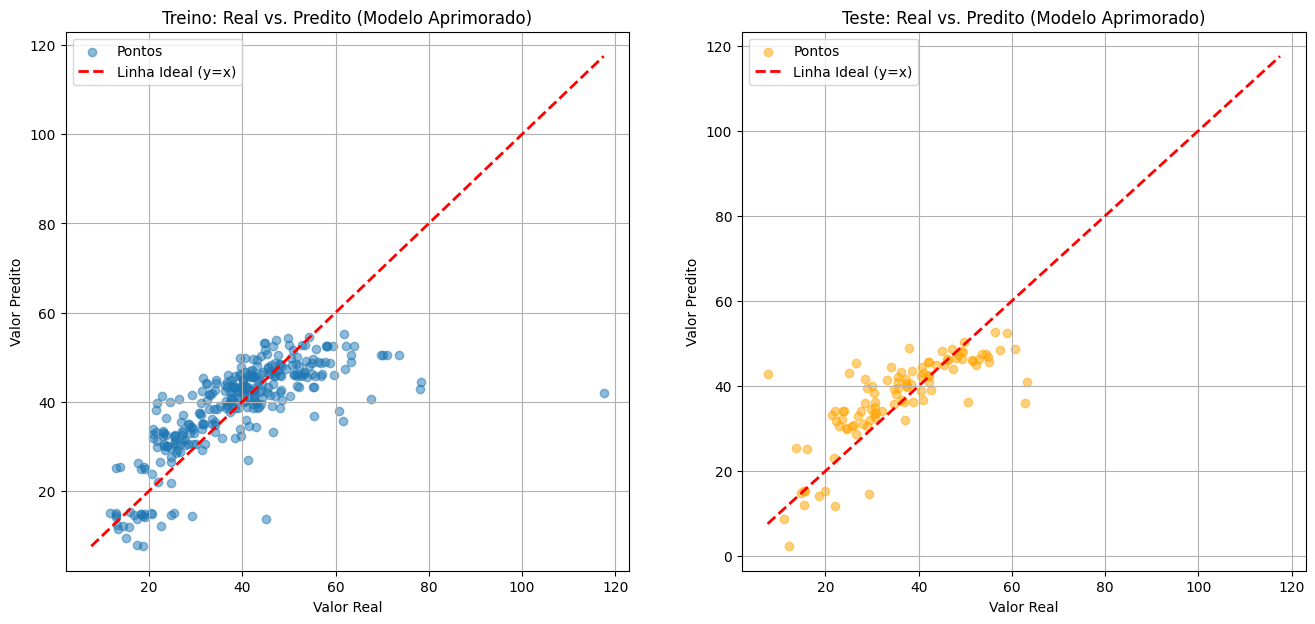

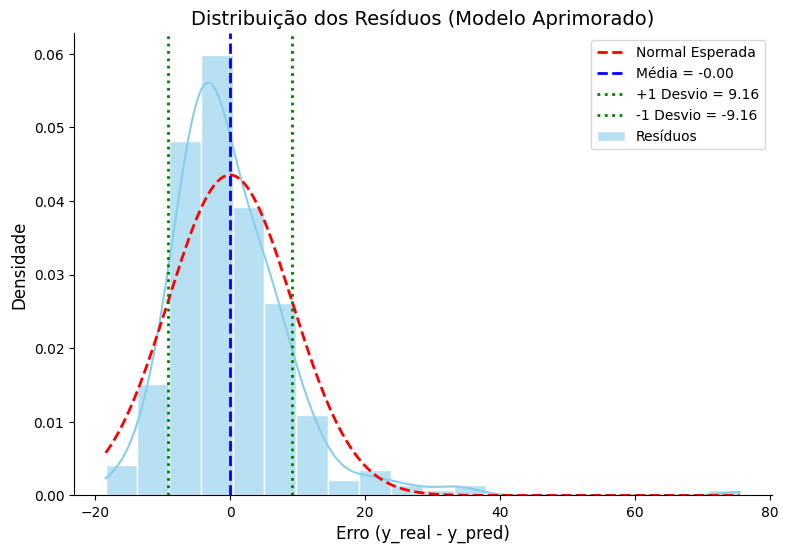

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

# --- 1. CARREGAMENTO E PREPARAÇÃO DOS DADOS ---
# Carregar os dados
path = r"G:\Meu Drive\UFC\MESTRADO\Int Computacional Aplicada\data\raw\Real estate valuation data set.xlsx"
df = pd.read_excel(io=path)

# Selecionar features e target
X = df[["X2 house age", "X3 distance to the nearest MRT station",
        "X4 number of convenience stores", "X5 latitude", "X6 longitude"]]
y = df["Y house price of unit area"]

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# --- 2. CRIAÇÃO E TREINO DO MODELO APRIMORADO ---
# Pipeline com StandardScaler, PolynomialFeatures e Ridge
model =CustomLinearRegression() 

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer predições tanto no treino quanto no teste
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


# --- 3. GERAÇÃO DOS PLOTS ---

# === GRÁFICO 1: DISPERSÃO (REAL vs. PREDITO) ===
plt.figure(figsize=(16, 7))

# Gráfico de Treino
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5, label="Pontos")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2, label="Linha Ideal (y=x)")
plt.xlabel("Valor Real")
plt.ylabel("Valor Predito")
plt.title("Treino: Real vs. Predito (Modelo Aprimorado)")
plt.grid(True)
plt.legend()

# Gráfico de Teste
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5, color='orange', label="Pontos")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2, label="Linha Ideal (y=x)")
plt.xlabel("Valor Real")
plt.ylabel("Valor Predito")
plt.title("Teste: Real vs. Predito (Modelo Aprimorado)")
plt.grid(True)
plt.legend()

plt.show()


# === GRÁFICO 2: DISTRIBUIÇÃO DOS RESÍDUOS (TREINO) ===
# Calcular os resíduos do conjunto de treino
residuals = y_train - y_train_pred

# Calcular média e desvio padrão dos resíduos
mu, sigma = residuals.mean(), residuals.std()
x = np.linspace(min(residuals), max(residuals), 200)

plt.figure(figsize=(9,6))

# Histograma + KDE dos resíduos
sns.histplot(residuals, bins=20, stat="density", kde=True,
             color="skyblue", edgecolor="white", alpha=0.6, label="Resíduos")

# Curva normal teórica
plt.plot(x, norm.pdf(x, mu, sigma), color="red", lw=2, linestyle="--", label="Normal Esperada")

# Linhas da média e desvio padrão
plt.axvline(mu, color="blue", linestyle="--", lw=2, label=f"Média = {mu:.2f}")
plt.axvline(mu + sigma, color="green", linestyle=":", lw=2, label=f"+1 Desvio = {mu+sigma:.2f}")
plt.axvline(mu - sigma, color="green", linestyle=":", lw=2, label=f"-1 Desvio = {mu-sigma:.2f}")

# Estilo do gráfico
plt.title("Distribuição dos Resíduos (Modelo Aprimorado)", fontsize=14)
plt.xlabel("Erro (y_real - y_pred)", fontsize=12)
plt.ylabel("Densidade", fontsize=12)
plt.legend()
sns.despine()
plt.show()